In [1]:
from controller import *

0.004801068027721231
0.19709960820707778 44.540087860807105 -7.341438024703901e-09 -0.681490101265464


0.004801068027721231
0.19709960820707778 44.540087860807105 -7.341438024703901e-09 -0.681490101265464


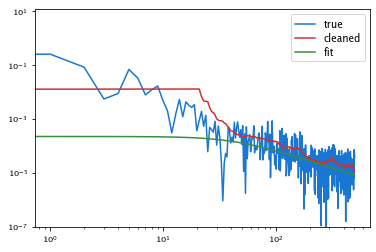

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


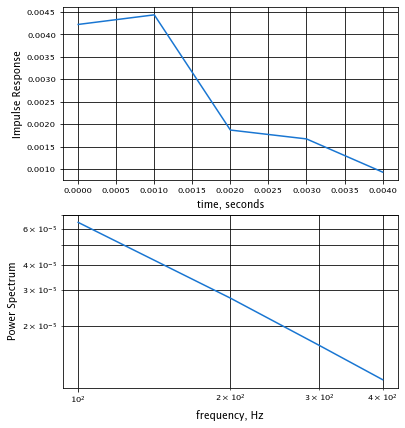

In [2]:
impulse = make_impulse(truth[:1000], N=10, plot=True)

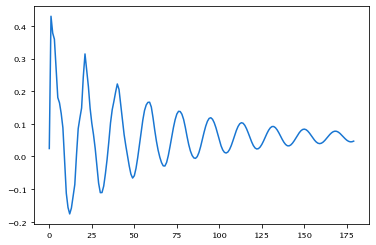

In [3]:
kalman.kfilter.state = truth[:kalman.kfilter.state.size]
plt.plot(kalman.kfilter.run(truth[kalman.kfilter.state.size:200]))